In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load data
df = pd.read_csv("/Users/mariahloehr/IICD/IICD/Data/cell_cycle_tidied.csv")

# Combine 'M' and 'G2' into one class, if desired (optional)
df['phase'] = df['phase'].replace({'M': 'G2'})

# Define features and target
X = df.drop(columns=['phase', 'age', 'PHATE_1', 'PHATE_2'])
y = df['phase']

feature_names = X.columns.tolist()
X = X.to_numpy()
y = y.to_numpy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=949, stratify=y)

LOCO

In [4]:
import sys
sys.path.append("/Users/mariahloehr/IICD/IICD/feature_importance")

In [5]:
import locomp
from locomp import *
from locomp.MLmodels import *
import itertools
import importlib
from sklearn.base import BaseEstimator, RegressorMixin, clone
import itertools
from functools import partial
import multiprocessing as mp
import re

In [6]:
# define fit_func
def mlr(X,Y):
    mlr = LogisticRegression(
    #multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    C=1.0, 
    random_state=949
                    ).fit(X, Y)    
    return mlr

In [8]:
J1 = 0
J2 = 1
m_ratio = 0.2
n_ratio = 0.2
B = 5000
fit_func = mlr

In [9]:
x=LOCOMPClass(X_train,y_train,n_ratio,m_ratio,B,fit_func, selected_features=[],alpha=0.1,bonf=False)
x.run_loco()

/Users/mariahloehr/IICD/IICD/feature_importance/locomp/util_locomp.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  idx_I =Y_pd.groupby(0, group_keys=False).apply(lambda x: x.sample(frac=n_ratio))
/Users/mariahloehr/IICD/IICD/feature_importance/locomp/util_locomp.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  idx_I =Y_pd.groupby(0, group_keys=False).apply(lambda x: x.sample(frac=n_ratio))
/Users/mariahloehr

In [10]:
x.loco_ci

array([[ 0.00000000e+00,  0.00000000e+00,  6.38892331e-03,
         6.99360539e-03,  6.69126435e-03],
       [ 0.00000000e+00,  0.00000000e+00,  5.02550651e-03,
         5.41505677e-03,  5.22028164e-03],
       [ 0.00000000e+00,  0.00000000e+00,  4.69387416e-03,
         5.09801367e-03,  4.89594392e-03],
       ...,
       [ 1.00000000e+00,  0.00000000e+00, -1.03179675e-03,
        -9.20151216e-04, -9.75973982e-04],
       [ 1.00000000e+00,  0.00000000e+00, -8.96238834e-04,
        -8.19810836e-04, -8.58024835e-04],
       [ 0.00000000e+00,  0.00000000e+00,  1.72678076e-02,
         1.81773214e-02,  1.77225645e-02]], shape=(262, 5))

In [11]:
ci_df = pd.DataFrame(x.loco_ci)
ci_df = ci_df.rename(columns={2: 'lower_bound', 3: 'upper_bound', 4: 'score'})
ci_df['feature_name'] = feature_names
fig_df = ci_df.nlargest(10, "score")

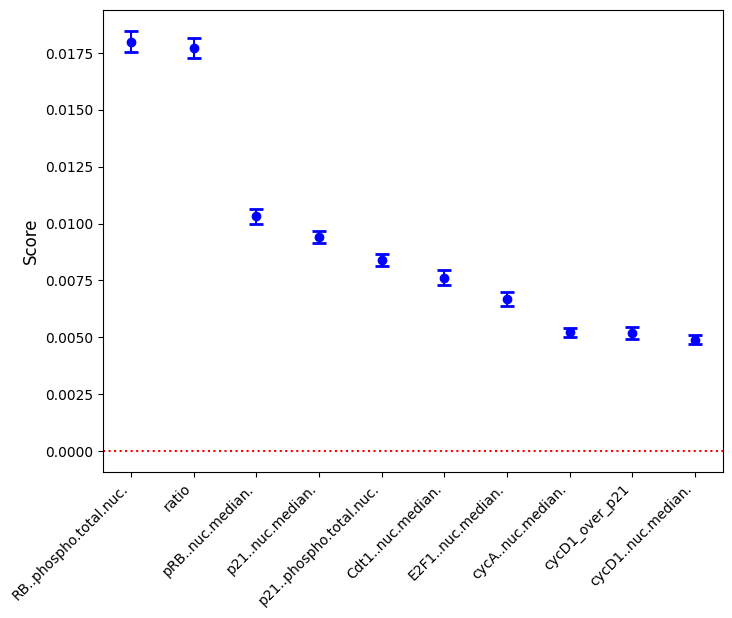

In [12]:
# Plot
plt.figure(figsize=(8, 6))
plt.errorbar(
    fig_df["feature_name"], fig_df["score"],
    yerr=[fig_df["score"] - fig_df["lower_bound"], fig_df["upper_bound"] - fig_df["score"]],
    fmt="o", capsize=5, capthick=2, markersize=6, color="b"
)
plt.axhline(y=0, color='r', linestyle='dotted')
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, fontsize=10, ha = 'right')
plt.show()